# Data preparation for P1 slowing down

In order to play with the P1 leakage correction method we need some homogenized micro-group data. For this purpuse Serpent 2.1.32 is used here for the simplest of cases: an idealized PWR pincell model.

The input file can be found in `fuel.deck`. The input homogenizes the pincell into the [default 70-group structure](http://serpent.vtt.fi/mediawiki/index.php?title=Pre-defined_energy_group_structures#Default_multi-group_structure) and performes a critical spectrum correction with the P1 method. This data is to be used for benchmark our own implementation of the P1 correction.

In this notebook we will load the data with [serpentTools](https://serpent-tools.readthedocs.io/en/master/), and save it into a JSON file, so the reader does not need to install serpentTools. Note, that there might be some mismatch between the latest version of serpentTools in pip and the latest version of numpy, so if someone wants to repeat the data preperation, they might need to fetch serpentTools directly from github. For this notebook commit 25ebdec64b0a352d7c9279e1465c7ae0c9dfa217 was downloaded and is directly imported.

Here only the bare minimum is saved into JSON, which is needed for the P1 solution and to compare our solution Serpent2's. The interested reader is adviced to extract and visualize other data in the result file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("C:\\Users\\elter\\Downloads\\serpent-tools-main\\serpent-tools-main\\src")
import serpentTools
import json

resFile = 'fuel.deck_res.m'
res = serpentTools.read(resFile)

root = res.getUniv('0',burnup=0)

gxs={
    'NG':root.numGroups,
    'Sig':list(root.infExp['infTot']),
    'SigS0':list(root.infExp['infS0']),
    'SigS1':list(root.infExp['infS1']),
    'nuSigf':list(root.infExp['infNsf']),
    'Chi':list(root.infExp['infChit']),
    'SigS1':list(root.infExp['infS1']),
    'micro':list(root.microGroups),
    'b1Flx':list(root.b1Exp['b1Flx']),
    'infFlx':list(root.infExp['infFlx'])
}

import json
with open('homogenizedXS.json', 'w', encoding='utf-8') as f:
    json.dump(gxs, f, ensure_ascii=False, indent=4)

SERPENT Serpent 2.1.32 found in fuel.deck_res.m, but version 2.1.31 is defined in settings
  Attempting to read anyway. Please report strange behaviors/failures to developers.


Here, we only visualize the $\Sigma_s0$ matrix, simply because it is beautiful, and might have some pedagogic value.

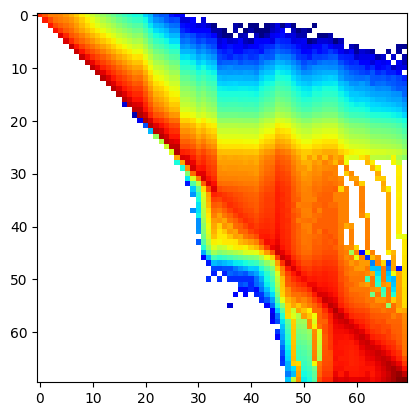

In [2]:
np.seterr(all='ignore')
plt.figure()
plt.imshow(np.log10(root.infExp['infS0'].reshape((root.numGroups,root.numGroups))),cmap='jet')
plt.show()